# Tahmin analizi 

### Tahmin tespiti için SVM Regressior, Randon Forest Regressior ve Linear Regression makine öğrenmesi teknikleri kullanacağız. 

    1. Veri Seti Yükleme ve Temizleme

    2. Değişkenler ayırma ve Veri Kümesinde Eğitim/Test verileri ayırma
    
    3. Makine Öğrenmesi Modelini Eğitme
        
    4. Tahminleyici Karşılaştırması - SVM, Random Forest ve Lineer Regresyon Modelleri
    
    5. Regresyon Modellerinin Performansının Karşılaştırılması için Metriklerin Hesaplanması


##     1. Veri Seti Yükleme ve Temizleme

In [15]:
# İlk olarak, Pandas ve Numpy kütüphanesini kullanarak veri setimizi yükleyeceğiz.

import pandas as pd
import numpy as np

In [16]:
# Veri setini yükleme 

df = pd.read_excel("/Users/ideakadikoy/Desktop/tahmin_200_250.xlsx")

In [17]:
df.head()

,INDIS,DEGER
0,1,95.112407
1,2,92.783107
2,3,2.001441
3,4,-71.68929
4,5,-41.582756


In [18]:
df.describe()

,INDIS
count,250.000000
mean,125.500000
std,72.312977
min,1.000000
25%,63.250000
50%,125.500000
75%,187.750000
max,250.000000


In [55]:
df.isnull().sum()

# toplam kaç hücrede eksik değer (NaN ya da None) olduğunu gözlemliyoruz. Burada 250 satırlık veri setimizde 50 değerin zaten tahmin etmemizi isteniyordu. 

INDIS    0
DEGER    0
dtype: int64

In [50]:
# 50 tane "?" işaretleri ile işaretlenmiş değerleri NaN ile değiştiriyoruz.
df.replace("?", np.nan, inplace=True)

In [51]:
# Sonra NaN değerlerini DEĞER sütunünda yer alan değerlerin ortalamasını alıp NAN degerleri yerine dolduruyoruz
df.fillna(df.mean(), inplace=True)

## 2. Değişkenler ayırma ve Veri Kümesinde Eğitim/Test verileri ayırma


In [52]:
# Giriş verilerini ve hedef değişkeni ayır
X = df.drop("DEGER", axis=1) # "DEGER" adlı sütunu kaldırarak yeni bir DataFrame döndüroyruz.
y = df["DEGER"]

In [53]:
# Veri kümesini eğitim ve test verilerine ayır
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scikit-learn kütüphanesinin model_selection modülünden train_test_split fonksiyonunu verilerinizi eğitim ve test setleri olarak bölmenizi sağlar.
# test_size parametresi, verilerinizi bölmenin ne kadarını test seti olarak kullanacağınızı belirler. 
#Burada, verilerin %20test %80Egitim seti olarak kullanılmasını seçtim.
# random_state parametresi, her çalıştırmada verilerin aynı şekilde bölünmesini sağlamak için kullanılan bir rastgele sayıdır.


##  3. Makine Öğrenmesi Modelini Eğitme

1. SVR = SVM regresyonu (SVM Regression), regresyon problemlerinde kullanılan bir SVM türüdür. SVM regresyonu, veriler arasındaki doğrusal veya doğrusal olmayan ilişkiyi tahmin etmek için kullanılır. Bu algoritma, bir eğitim setindeki verilerin belirli bir sınırlar aralığında olduğu varsayımına dayanır.


2. Random Forest = Scikit-learn kütüphanesinin ensemble modülü içinde yer alan RandomForestRegressor sınıfı, bu algoritmanın bir uygulamasıdır. Bu sınıf, rastgele seçilen özelliklerin alt kümesiyle birlikte birçok karar ağacı oluşturur ve sonuçları birleştirerek regresyon problemini çözer. Aynı zamanda, overfitting'e (aşırı öğrenmeye) karşı dirençli olmak için gürbüz bir yöntem olarak kabul edilir.



3. Linear Regression = Lineer regresyon, bir bağımlı değişkenin (outcome variable) bir veya daha fazla bağımsız değişkenle (predictor variable) olan ilişkisini açıklamak için kullanılan bir istatistiksel modelleme yöntemidir. Temel olarak, bu yöntem, verilerdeki değişkenler arasındaki ilişkiyi bir doğru ile ifade eder ve bu doğru üzerinde yeni tahminler yapılabilir.


In [56]:
# scikit-learn kütüphanesinden Modellerimi çağıyoruz

from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [57]:
svm_reg = SVR(kernel="linear") # Kernel parametresi lineer çekirdek kullanarak regresyon yapacağı belirtilmişt
rf_reg = RandomForestRegressor(random_state=42) # random_state ile rastgelelik kontrol ediyoruz.
lr_reg = LinearRegression(fit_intercept=True, normalize=False) # fit_intercept: Bu parametre, eğriye bir y-kesit eklemek için kullanılır. 

In [58]:
svm_reg.fit(X_train, y_train)
rf_reg.fit(X_train, y_train)
lr_reg.fit(X_train, y_train)

LinearRegression()

In [59]:
# Tahminleri yap
svm_pred = svm_reg.predict(X_test)
rf_pred = rf_reg.predict(X_test)
lr_pred = lr_reg.predict(X_test)

## Tahminleyici Karşılaştırması - SVM, Random Forest ve Lineer Regresyon Modelleri

1. Bu görselleştirme, farklı makine öğrenimi modelleriyle (SVM, Random Forest, Lineer Regresyon) tahmin edilen değerlerin gerçek değerlerle karşılaştırılmasını göstermektedir. 

2. Tahmin edilen değerleri her bir model için görmek için, öncelikle her bir modelin 200. satırdan sonraki  tahminlerini

In [60]:
svm_y_pred = svm_reg.predict(X[200:])

In [61]:
print(svm_y_pred)

[101.02324999 101.10601046 101.18877093 101.2715314  101.35429187
 101.43705234 101.51981281 101.60257328 101.68533375 101.76809422
 101.85085469 101.93361516 102.01637562 102.09913609 102.18189656
 102.26465703 102.3474175  102.43017797 102.51293844 102.59569891
 102.67845938 102.76121985 102.84398032 102.92674078 103.00950125
 103.09226172 103.17502219 103.25778266 103.34054313 103.4233036
 103.50606407 103.58882454 103.67158501 103.75434548 103.83710594
 103.91986641 104.00262688 104.08538735 104.16814782 104.25090829
 104.33366876 104.41642923 104.4991897  104.58195017 104.66471064
 104.7474711  104.83023157 104.91299204 104.99575251 105.07851298]


In [62]:
rf_y_pred = rf_reg.predict(X[200:])

In [63]:
print(rf_y_pred)

[202.84363708 130.79459037 106.68749837 102.11637562 102.11637562
 102.11637562 102.11637562 102.11637562 102.11637562 102.11637562
 102.11637562 102.11637562 102.11637562 102.11637562 102.11637562
 102.11637562 102.11637562 102.11637562 102.11637562 102.11637562
 102.11637562 102.11637562 102.11637562 102.11637562 102.11637562
 102.11637562 102.11637562 102.11637562 102.11637562 102.11637562
 102.11637562 102.11637562 102.11637562 102.11637562 102.11637562
 102.11637562 102.11637562 102.11637562 102.11637562 102.11637562
 102.11637562 102.11637562 102.11637562 102.11637562 102.11637562
 102.11637562 102.11637562 102.11637562 102.11637562 102.11637562]


In [64]:
lr_y_pred = lr_reg.predict(X[200:])
print(lr_y_pred)

[136.30814719 136.74207251 137.17599783 137.60992315 138.04384846
 138.47777378 138.9116991  139.34562442 139.77954974 140.21347506
 140.64740038 141.0813257  141.51525102 141.94917634 142.38310165
 142.81702697 143.25095229 143.68487761 144.11880293 144.55272825
 144.98665357 145.42057889 145.85450421 146.28842953 146.72235484
 147.15628016 147.59020548 148.0241308  148.45805612 148.89198144
 149.32590676 149.75983208 150.1937574  150.62768272 151.06160803
 151.49553335 151.92945867 152.36338399 152.79730931 153.23123463
 153.66515995 154.09908527 154.53301059 154.9669359  155.40086122
 155.83478654 156.26871186 156.70263718 157.1365625  157.57048782]


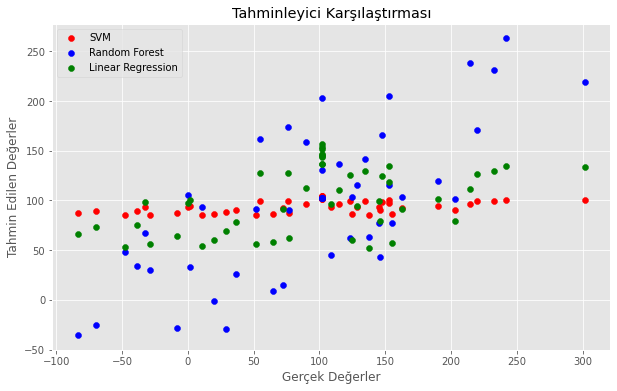

In [65]:
# Görselleştirme
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))


plt.scatter(y_test, svm_pred, color="red", label="SVM")
plt.scatter(y_test, rf_pred, color="blue", label="Random Forest")
plt.scatter(y_test, lr_pred, color="green", label="Linear Regression")

plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin Edilen Değerler")
plt.title("Tahminleyici Karşılaştırması")
plt.legend()
plt.show()

## Regresyon Modellerinin Performansının Karşılaştırılması için Metriklerin Hesaplanması
    
    * Burada, y_test gerçek değerler, svm_y_pred, rf_y_pred ve lr_y_pred ise sırasıyla SVM Regressor, Random Forest Regressor ve Lineer Regresyon modellerinin tahminleri yer almaktadır. R2_score, mean_squared_error ve mean_absolute_error fonksiyonları, sırasıyla R-kare, MSE ve MAE metriklerini hesaplamak için kullanılır.
    
    R-Kare (R-Squared) Skoru: R-kare skoru, bağımsız değişkenlerin bağımlı değişkendeki varyasyonu açıklama yüzdesini ölçer. 1'e ne kadar yakınsa, modelin bağımlı değişkendeki varyasyonu o kadar iyi açıkladığı anlamına gelir.

    Ortalama Kare Hata (Mean Squared Error): MSE, model tahminlerinin gerçek değerlerden ne kadar uzak olduğunu ölçer. Daha düşük bir MSE, modelin daha iyi bir performans gösterdiği anlamına gelir.

    Ortalama Mutlak Hata (Mean Absolute Error): MAE, model tahminlerinin gerçek değerlerden ortalama olarak ne kadar uzak olduğunu ölçer. Daha düşük bir MAE, modelin daha iyi bir performans gösterdiği anlamına gelir.

In [44]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# SVM Regressor
svm_r2 = r2_score(y_test, svm_y_pred)
svm_mse = mean_squared_error(y_test, svm_y_pred)
svm_mae = mean_absolute_error(y_test, svm_y_pred)

# Random Forest Regressor
rf_r2 = r2_score(y_test, rf_y_pred)
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_mae = mean_absolute_error(y_test, rf_y_pred)

# Linear Regression
lr_r2 = r2_score(y_test, lr_y_pred)
lr_mse = mean_squared_error(y_test, lr_y_pred)
lr_mae = mean_absolute_error(y_test, lr_y_pred)


In [45]:
print("SVM Regressor R-Squared: ", svm_r2)
print("SVM Regressor MSE: ", svm_mse)
print("SVM Regressor MAE: ", svm_mae)

SVM Regressor R-Squared:  -0.012708655986675366
SVM Regressor MSE:  7035.3326466358985
SVM Regressor MAE:  63.48983712696119


In [46]:
print("Random Forest Regressor R-Squared: ", rf_r2)
print("Random Forest Regressor MSE: ", rf_mse)
print("Random Forest Regressor MAE: ", rf_mae)

Random Forest Regressor R-Squared:  0.032857642808280185
Random Forest Regressor MSE:  6718.781516551813
Random Forest Regressor MAE:  60.590162300193704


In [47]:
print("Linear Regression R-Squared: ", lr_r2)
print("Linear Regression MSE: ", lr_mse)
print("Linear Regression MAE: ", lr_mae)

Linear Regression R-Squared:  -0.4115294195417536
Linear Regression MSE:  9805.958454372863
Linear Regression MAE:  77.34165021291592
